# Immediate VS 1WK False Memories Analysis

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [ ]:
filtered_columns_df = pd.read_csv('joint_analysis.csv')

In [ ]:
filtered_columns_df['main_false_memories'] = filtered_columns_df.apply(
    lambda row: (row[['PostQues_3', 'PostQues_10', 'PostQues_14', 'PostQues_20', 'PostQues_25']] > 4).sum(), axis=1
)
filtered_columns_df['follow_false_memories'] = filtered_columns_df.apply(
    lambda row: (row[['Q3', 'Q10', 'Q14', 'Q20', 'Q25']] > 4).sum(), axis=1
)

/tmp/ipykernel_457/860869859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_columns_df['main_false_memories'] = filtered_columns_df.apply(
/tmp/ipykernel_457/860869859.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_columns_df['follow_false_memories'] = filtered_columns_df.apply(


In [ ]:
filtered_columns_df

,prolific,Exp_condition,PostQues_3,PostQues_10,PostQues_14,PostQues_20,PostQues_25,SAM_scale_1,SAM_scale_2,SAM_scale_3,...,DemModQues_personal,DemModQues_interest,Q3,Q10,Q14,Q20,Q25,NASA_TLX,main_false_memories,follow_false_memories
0,5e9e207c1af35c1edbf976ca,survey-based,4,5,4,4,2,3,2,2,...,2,6,4,6,4,3,2,2053,1,1
1,5fadd628cd4e9e1c42dab969,static-chatbot,4,3,2,4,2,2,4,2,...,2,3,5,4,2,4,2,8248810,0,1
2,65198ba1126ba439e0d8f29f,none,1,2,2,4,1,2,3,5,...,2,5,1,5,3,3,1,4001030,0,1
3,5de7f5d27c17f804d007da90,chatbot,4,3,2,2,2,1,4,4,...,2,5,6,4,2,3,1,19314181415,0,1
4,610863156133d1485b80d389,none,2,6,2,4,2,1,4,1,...,2,6,2,4,2,6,2,50101231,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,5fb8b141a2e5dd63494c80f1,static-chatbot,5,7,2,6,4,1,5,1,...,2,1-Not interested at all,5,7,2,4,4,1706141312,3,2
191,60d35818b8957f3c1c0619d0,static-chatbot,1,5,3,6,4,1,1,1,...,2,4,7,3,3,4,4,104412164,2,1
192,5ea9e78822bb3115676e8296,none,2,2,2,4,4,1,4,3,...,2,5,2,4,4,4,4,40620020,0,0
193,652014a6230cfe011fd5ec48,survey-based,4,2,1,7,1,1,4,2,...,2,7-Very interested,2,2,5,1,1,1221015166,1,1


In [ ]:
category_order = ['none', 'survey-based', 'static-chatbot', 'chatbot']
filtered_columns_df['Exp_condition'] = pd.Categorical(filtered_columns_df['Exp_condition'], categories=category_order, ordered=True)

/tmp/ipykernel_457/3895658939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_columns_df['Exp_condition'] = pd.Categorical(filtered_columns_df['Exp_condition'], categories=category_order, ordered=True)


In [ ]:
# Group by 'Exp_condition' and calculate mean
condition_means = filtered_columns_df.groupby('Exp_condition')[['main_false_memories', 'follow_false_memories']].mean()

print(condition_means)  # To verify the means calculated

                main_false_memories  follow_false_memories
Exp_condition                                             
none                       0.551020               1.020408
survey-based               1.020833               1.458333
static-chatbot             1.270833               1.416667
chatbot                    1.836735               1.836735
/tmp/ipykernel_457/3193004903.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  condition_means = filtered_columns_df.groupby('Exp_condition')[['main_false_memories', 'follow_false_memories']].mean()


In [ ]:
# Function to add significance markers
def add_significance(ax, significance_pairs, indices, data, bar_width, y_offset=0.05):
    for pair in significance_pairs:
        x1, x2 = indices[pair[0][0]], indices[pair[1][0]]
        y1, y2 = data.loc[data.index[pair[0][0]], pair[0][1]], data.loc[data.index[pair[1][0]], pair[1][1]]
        max_y = max(y1, y2) + y_offset
        
        ax.plot([x1 - bar_width/2, x1 - bar_width/2, x2 + bar_width/2, x2 + bar_width/2],
                [y1, max_y, max_y, y2], lw=1.5, c='k')
        ax.text((x1 + x2) / 2, max_y + y_offset, "* P=0.0105", ha='center', va='bottom', color='k')

In [ ]:
# Function to add significance markers
def add_significance_2(ax, significance_pairs, indices, data, bar_width, y_offset=0.05):
    for pair in significance_pairs:
        x1, x2 = indices[pair[0][0]], indices[pair[1][0]]
        y1, y2 = data.loc[data.index[pair[0][0]], pair[0][1]], data.loc[data.index[pair[1][0]], pair[1][1]]
        max_y = max(y1, y2) + y_offset
        
        ax.plot([x1 - bar_width/2, x1 - bar_width/2, x2 + bar_width/2, x2 + bar_width/2],
                [y1, max_y, max_y, y2], lw=1.5, c='k')
        ax.text((x1 + x2) / 2, max_y + y_offset, "** P=0.0026", ha='center', va='bottom', color='k')

In [ ]:
# Statistical significance pairs (example)
significance_pairs = [((1, 'main_false_memories'), (1, 'follow_false_memories')),
                    ]

In [ ]:
# Statistical significance pairs (example)
significance_pairs2 = [((0, 'main_false_memories'), (0, 'follow_false_memories')), 
                    ]

In [ ]:
ordered_labels = ['none', 'survey based', 'prescripted chatbot', 'generative chatbot']
# main_colors = ['#B0B0B0', '#88CCEE', '#DDCC77', '#CC6677']
# follow_colors = ['#D3D3D3', '#87CEEB', '#FFE066', '#FF9999']

In [ ]:
main_colors = ['#B0B0B0', '#4682B4', '#DAA520', '#CC6677']
follow_colors = ['#D3D3D3', '#88CCEE', '#FFD700', '#FF7F7F']

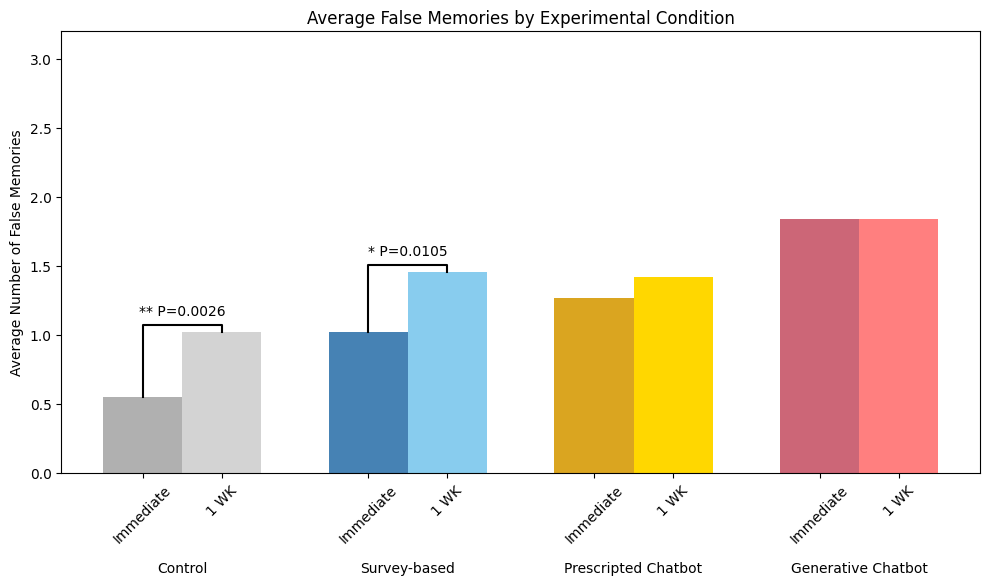

In [ ]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the size as needed
width = 0.35  # the width of the bars
indices = np.arange(len(condition_means))  # the label locations
plot_labels = ['Control', 'Survey-based', 'Prescripted Chatbot', 'Generative Chatbot']

rects1 = ax.bar(indices - width/2, condition_means['main_false_memories'], width, label='Main False Memories', color=main_colors)
rects2 = ax.bar(indices + width/2, condition_means['follow_false_memories'], width, label='Follow False Memories', color=follow_colors)

ax.set_title('Average False Memories by Experimental Condition')
#ax.set_xlabel('Experimental Condition')
ax.set_ylabel('Average Number of False Memories')
#ax.set_xticks(indices)
#ax.set_xticklabels(condition_means.index)

# Add value labels to each bar
#for rect in rects1 + rects2:
#    height = rect.get_height()
#    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Set custom x-tick positions and labels
sub_indices = [0-0.35/2,0+0.35/2,1-0.35/2,1+0.35/2,2-0.35/2,2+0.35/2,3-0.35/2,3+0.35/2]
follow_xticks = indices + width / 2
condition_xticks = indices
follow_xticklabels = ['f','f','f','f'] #condition_means.index
ax.set_xticks(follow_xticks)
ax.set_xticklabels(follow_xticklabels)
main_xticks = sub_indices
main_xticklabels = ['Immediate','1 WK','Immediate','1 WK','Immediate','1 WK','Immediate','1 WK'] #condition_means.index
ax.set_xticks(main_xticks)
ax.set_xticklabels(main_xticklabels, rotation=45)

# Add custom gridlines as proxy ticks
for i, label in enumerate(plot_labels):
    #ax.axvline(x=custom_xticks[i], color='gray', linestyle='--', alpha=0.5)
    ax.text(condition_xticks[i], -0.2, label, ha='center', va='top', transform=ax.get_xaxis_transform())

# Move the legend outside the plot
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)

plt.ylim(0, 3.2)

# Add significance markers
add_significance(ax, significance_pairs, indices, condition_means, width)
add_significance_2(ax, significance_pairs2, indices, condition_means, width)

plt.tight_layout()
plt.savefig('immediate_1WK_false_mem.png')

plt.show()

In [ ]:
from scipy import stats

# Sample data
main_memories = filtered_columns_df['main_false_memories']
follow_memories = filtered_columns_df['follow_false_memories']

In [ ]:
# Checking for normality of differences
w_stat, p_value_normality = stats.shapiro(main_memories - follow_memories)

print(f'W-statistic (Normality): {w_stat:.3f}')
print(f'P-value (Normality): {p_value_normality:.3f}')

if p_value_normality < 0.05:
    print("Data does not follow a normal distribution.")
else:
    print("Data follows a normal distribution.")

W-statistic (Normality): 0.908
P-value (Normality): 0.000
Data does not follow a normal distribution.


In [ ]:
# Using Wilcoxon signed-rank test if normality assumption is violated
w_stat, p_value_wilcoxon = stats.wilcoxon(main_memories, follow_memories)

print(f'Wilcoxon Statistic: {w_stat:.3f}')
print(f'P-value (Wilcoxon): {p_value_wilcoxon:.3f}')

if p_value_wilcoxon < 0.05:
    print("There is a significant difference between the two memory types (non-parametric).")
else:
    print("There is no significant difference between the two memory types (non-parametric).")

Wilcoxon Statistic: 1876.500
P-value (Wilcoxon): 0.003
There is a significant difference between the two memory types (non-parametric).


In [ ]:
# Initialize a list to store results
results = []

# Loop through each group defined by unique values of 'Exp_condition'
for condition, group in filtered_columns_df.groupby('Exp_condition'):
    # Perform Shapiro-Wilk test for normality on the differences
    diff = group['main_false_memories'] - group['follow_false_memories']
    normality_stat, normality_p = stats.shapiro(diff)
    
    # Decide which test to use based on normality result
    if normality_p < 0.05:
        # If not normal, use Wilcoxon Signed-Rank Test
        stat, p = stats.wilcoxon(group['main_false_memories'], group['follow_false_memories'])
        test_used = 'Wilcoxon'
    else:
        # If normal, use Paired t-test
        stat, p = stats.ttest_rel(group['main_false_memories'], group['follow_false_memories'])
        test_used = 'Paired t-test'
    
    # Store results in list
    results.append({
        'Condition': condition,
        'Test Used': test_used,
        'Statistic': stat,
        'P-Value': p,
        'Significant Difference': 'Yes' if p < 0.05 else 'No',
        'normality stat': normality_stat,
        'normality p value': normality_p
    })

# Convert results to DataFrame for nicer display
results_df = pd.DataFrame(results)
print(results_df)

        Condition Test Used  Statistic   P-Value Significant Difference  \
0            none  Wilcoxon       42.5  0.002611                    Yes   
1    survey-based  Wilcoxon       70.5  0.010463                    Yes   
2  static-chatbot  Wilcoxon      200.0  0.488975                     No   
3         chatbot  Wilcoxon      186.5  0.950473                     No   

   normality stat  normality p value  
0        0.858358           0.000031  
1        0.886852           0.000243  
2        0.929984           0.006809  
3        0.899689           0.000537  
/tmp/ipykernel_457/2841044374.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for condition, group in filtered_columns_df.groupby('Exp_condition'):
/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/stats/_morestats.py:3337:

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e32e89f2-6d44-49b2-bfdc-83c1c87a0fb5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>